<a href="https://colab.research.google.com/github/stehrbaer/Evaluating-Soft-Actor-Critic-Agent-Performance-of-Equity-Trading-using-FinRL-/blob/main/NASDAQ_SAC_Alpaca_Agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NASDAQ Back Test with SAC Agent**

In this edition of the project, we back test the SAC agent using by training it to trade a more comprehensive index (NASDAQ) showing how the agent manages to effectively trade equities and use technical and risk indicators to assess the risk within equities.

Soft Actor Critic is an actor-critic reinforcement learning algorithm developed by Google and UC Berkley. The algorithm is based on a maximum entropy reinforcement learning method, and its goal is to identify the best course of action that maximizes both long-term expected reward and long-term entropy.

The actor-critic algorithm employs two networks, an actor and a critic, where the actor makes decisions, and the critic evaluates the actor's decisions and rewards and adjusts the actor's decisions based on the environment setting. Learning is achieved in a value-based fashion, where the training reward is based on minimizing the squared difference between the expected predicted value of the Q function and the discounted value of the future state value of the next time step.

**Main Library used in FinRL** 

@article{finrl_meta_2021,
    author = {Liu, Xiao-Yang and Rui, Jingyang and Gao, Jiechao and Yang, Liuqing and Yang, Hongyang and Wang, Zhaoran and Wang, Christina Dan and Guo Jian},
    title   = {{FinRL-Meta}: Data-Driven Deep ReinforcementLearning in Quantitative Finance},
    journal = {Data-Centric AI Workshop, NeurIPS},
    year    = {2021}
}

**Requirments**

Guide for installing FinRL can be found below:
https://github.com/AI4Finance-Foundation/FinRL/blob/master/docs/source/start/installation.rst

Required Packages to run FinRL library on MACinclude:
- Python 3.7
- Anaconda 
- Homebrew
- OpenAI

Following installation, install or run FinRL library.

In [1]:
# installing finrl library

!pip install git+https://github.com/AI4Finance-Foundation/FinRL.git


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/AI4Finance-Foundation/FinRL.git to /tmp/pip-req-build-lb13v3sz
  Running command git clone -q https://github.com/AI4Finance-Foundation/FinRL.git /tmp/pip-req-build-lb13v3sz
  Cloning https://github.com/quantopian/pyfolio.git to /tmp/pip-install-b6epvw3j/pyfolio_f91fdac1d5854507a0e19caa3f6e6ab5
  Running command git clone -q https://github.com/quantopian/pyfolio.git /tmp/pip-install-b6epvw3j/pyfolio_f91fdac1d5854507a0e19caa3f6e6ab5
  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to /tmp/pip-install-b6epvw3j/elegantrl_ace0cd8676384d3091fbecf767112ec5
  Running command git clone -q https://github.com/AI4Finance-Foundation/ElegantRL.git /tmp/pip-install-b6epvw3j/elegantrl_ace0cd8676384d3091fbecf767112ec5
     |████████████████████████████████| 2.3 MB 7.5 MB/s 
     |████████████████████████████████| 234 kB 71.3 MB/s 
     |████████████████████████

**Packages**
 
 The following packages must be installed before running the code below:
 - Pandas 
 - Numpy
 - Matplot Library 
 - Date Time
 - FinRL 
 - Alpaca Trading 
 - TensorFlow
 - Open AI Gym 
 - stable-baselines
 - Pyfolio
 - Yahoo Finance API


In [2]:
#Importing relevant packages 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent
from finrl.meta.data_processor import DataProcessor

from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline
from pprint import pprint

import sys
sys.path.append("../FinRL")

import itertools

/usr/local/lib/python3.7/dist-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


In [3]:
from finrl import config
from finrl import config_tickers
import os
from finrl.main import check_and_make_directories
from finrl.config import (
    DATA_SAVE_DIR,
    TRAINED_MODEL_DIR,
    TENSORBOARD_LOG_DIR,
    RESULTS_DIR,
    INDICATORS,
    TRAIN_START_DATE,
    TRAIN_END_DATE,
    TEST_START_DATE,
    TEST_END_DATE,
    TRADE_START_DATE,
    TRADE_END_DATE,
)
check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])

In [4]:
#Configuring start and end for training and back testing period for trading 
# from config.py, TRAIN_START_DATE is a string
TRAIN_START_DATE
# from config.py, TRAIN_END_DATE is a string
TRAIN_END_DATE

'2020-07-31'

In [5]:
TRAIN_START_DATE = '2017-01-01'
TRAIN_END_DATE = '2022-08-01'
TRADE_START_DATE = '2020-08-01'
TRADE_END_DATE = '2022-08-01'

In [6]:
#Using Yahoo Finance to download NASDAQ dataset 
df = YahooDownloader(start_date = TRAIN_START_DATE,
                     end_date = TRADE_END_DATE,
                     ticker_list = config_tickers.NAS_100_TICKER).fetch_data()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- XLNX: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********

**Indicator** 

Instead of using the default parameters of using all indicators, we utilize select technical indicators in this edition.

**MACD**
The MACD or Moving Average Convergence / Divergence indicator is a momentum-based oscillator used to measure trends in financial markets. It is typically used to gauge whether an asset is over-bought or over-sold based on moving averages within different timeframes and a signaling line which is used to indicate whether an asset should be sold or bought. The MACD is typically calculated by subtracting the 26-day exponential moving average from the 12-day period exponential moving average, in combination with a 9-day exponential moving average, used as the signaling line.  

**Relative Strength Index**
The relative strength indicator is a momentum indicator that measures the speed and magnitude of an asset’s price change to evaluate whether an asset is over- or under-valued. The indicator was developed by J. Welles Wilder Jr., who developed RSI as well as several other technical indicators used in the financial market. The RSI is based on a 100-point scale, where a value of 70 and above indicates that an asset is overbought and a value of 30 or below indicates that an asset is over-sold.  

**Bollinger Bands**
Bollinger Bands are a type of trend indicator defined by a set of trendlines based on two standard deviations, positive and negative, from the moving average of a commodities price. The range of moving average can be adjusted by the user, depending on the user’s preference, typically a 20-day timeframe is utilized when calculating the Bollinger Bands. Bollinger bands were developed by technical trader John Bollinger, who recommended 22 rules to follow when using the bands within a trading system. Unlike the RSI and MACD, the Bollinger bands are typically used more as a reference, not as a stand-alone metric.  Bollinger Bands are a type of trend indicator defined by a set of trendlines based on two standard deviations, positive and negative, from the moving average of a commodities price. The range of moving average can be adjusted by the user, depending on the user’s preference, typically a 20-day timeframe is utilized when calculating the Bollinger Bands. Bollinger bands were developed by technical trader John Bollinger, who recommended 22 rules to follow when using the bands within a trading system. Unlike the RSI and MACD, the Bollinger bands are typically used more as a reference, not as a stand-alone metric.  

**ADX**
The average direction index (ADX) is an indicator that was designed by Welles Wilder, it has become another standard tool to evaluate the strength of trends within a finance market’s asset. The indicator consists of both positive and negative directional index, with a trendline to help trader identify the strength of a trend within an asset’s price.  

**Simple Moving Averages**
Moving average value of the closing price value calculated for 30 to 60 periods for time interval.

In [7]:
INDICATORS

tech_indicators = ['macd',
 'rsi_30',
 'boll_ub',
 'boll_lb',
 'close_30_sma',
 'close_60_sma',
 'dx_30']

In [8]:
df.sort_values(['date','tic'],ignore_index=True).head()

,date,open,high,low,close,volume,tic,day
0,2017-01-03,47.279999,47.340000,46.139999,44.741230,6737800.0,AAL,1
1,2017-01-03,28.950001,29.082500,28.690001,27.219839,115127600.0,AAPL,1
2,2017-01-03,103.430000,104.029999,102.809998,103.480003,2277400.0,ADBE,1
3,2017-01-03,72.599998,74.129997,72.089996,64.728287,2687200.0,ADI,1
4,2017-01-03,102.379997,103.580002,102.309998,92.189117,2227400.0,ADP,1


In [9]:
#adding turbulence, Vix and other financial indicators to dataset
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    tech_indicator_list = tech_indicators,
                    use_vix=True,
                    use_turbulence=True,
                    user_defined_feature = False)

processed = fe.preprocess_data(df)


Successfully added technical indicators
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (1402, 8)
Successfully added vix
Successfully added turbulence index


In [10]:
list_ticker = processed["tic"].unique().tolist()
list_date = list(pd.date_range(processed['date'].min(),processed['date'].max()).astype(str))
combination = list(itertools.product(list_date,list_ticker))

processed_full = pd.DataFrame(combination,columns=["date","tic"]).merge(processed,on=["date","tic"],how="left")
processed_full = processed_full[processed_full['date'].isin(processed['date'])]
processed_full = processed_full.sort_values(['date','tic'])

processed_full = processed_full.fillna(0)

In [11]:
#fully processed dataset to be used for training 
processed_full.sort_values(['date','tic'],ignore_index=True).head(30)


,date,tic,open,high,low,close,volume,day,macd,rsi_30,boll_ub,boll_lb,close_30_sma,close_60_sma,dx_30,vix,turbulence
0,2017-01-03,AAL,47.279999,47.340000,46.139999,44.741230,6737800.0,1.0,0.0,100.0,45.481134,44.387857,44.741230,44.741230,100.0,12.85,0.0
1,2017-01-03,AAPL,28.950001,29.082500,28.690001,27.219839,115127600.0,1.0,0.0,100.0,45.481134,44.387857,27.219839,27.219839,100.0,12.85,0.0
2,2017-01-03,ADBE,103.430000,104.029999,102.809998,103.480003,2277400.0,1.0,0.0,100.0,45.481134,44.387857,103.480003,103.480003,100.0,12.85,0.0
3,2017-01-03,ADI,72.599998,74.129997,72.089996,64.728287,2687200.0,1.0,0.0,100.0,45.481134,44.387857,64.728287,64.728287,100.0,12.85,0.0
4,2017-01-03,ADP,102.379997,103.580002,102.309998,92.189117,2227400.0,1.0,0.0,100.0,45.481134,44.387857,92.189117,92.189117,100.0,12.85,0.0
5,2017-01-03,ADSK,74.610001,77.099998,74.500000,76.180000,1896300.0,1.0,0.0,100.0,45.481134,44.387857,76.180000,76.180000,100.0,12.85,0.0
6,2017-01-03,ALGN,96.489998,98.330002,95.800003,96.959999,816700.0,1.0,0.0,100.0,45.481134,44.387857,96.959999,96.959999,100.0,12.85,0.0
7,2017-01-03,AMAT,32.360001,32.709999,31.660000,29.764763,13209400.0,1.0,0.0,100.0,45.481134,44.387857,29.764763,29.764763,100.0,12.85,0.0
8,2017-01-03,AMD,11.420000,11.650000,11.020000,11.430000,55182000.0,1.0,0.0,100.0,45.481134,44.387857,11.430000,11.430000,100.0,12.85,0.0
9,2017-01-03,AMGN,147.860001,151.000000,147.119995,127.357101,3640900.0,1.0,0.0,100.0,45.481134,44.387857,127.357101,127.357101,100.0,12.85,0.0


In [12]:
train = data_split(processed_full, TRAIN_START_DATE,TRAIN_END_DATE)
trade = data_split(processed_full, TRADE_START_DATE,TRADE_END_DATE)
print(len(train))
print(len(trade))

128984
46092


In [25]:
stock_dimension = len(train.tic.unique())
state_space = 1 + 2*stock_dimension + len(tech_indicators)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")
buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension



Stock Dimension: 92, State Space: 829


In [26]:
#setting environment parameters for agent to trade in 
env_kwargs = {
    "hmax": 100,
    "initial_amount": 100000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": tech_indicators,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}


In [27]:
e_train_gym = StockTradingEnv(df = train, **env_kwargs)


In [28]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))


<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


In [29]:
#setting up agent
agent = DRLAgent(env = env_train)


In [30]:
#setting up agent and agent environment for training 
agent = DRLAgent(env = env_train)
SAC_PARAMS = {
    "batch_size": 128,
    "buffer_size": 1000000,
    "learning_rate": 0.0003,
    "learning_starts": 100,
    "ent_coef": "auto_0.1",
}

model_sac = agent.get_model("sac",model_kwargs = SAC_PARAMS)

{'batch_size': 128, 'buffer_size': 1000000, 'learning_rate': 0.0003, 'learning_starts': 100, 'ent_coef': 'auto_0.1'}
Using cpu device


**Algorithm at work**

During training, a SAC agent:

* Updates the actor and critic properties at regular intervals during learning.

* Estimates the mean and standard deviation of a Gaussian probability distribution for the continuous action space, then randomly selects actions based on the distribution.

* Updates an entropy weight term that balances the expected return and the entropy of the policy.

* Stores past experience using a circular experience buffer. The agent updates the actor and critic using a mini-batch of experiences randomly sampled from the buffer.

Source: mathworks.com/help/reinforcement-learning/ug/sac-agents.html

In [31]:
#training SAC Agent
trained_sac = agent.train_model(model=model_sac, 
                             tb_log_name='sac',
                             total_timesteps=60000)

------------------------------------
| time/              |             |
|    episodes        | 4           |
|    fps             | 13          |
|    time_elapsed    | 403         |
|    total_timesteps | 5608        |
| train/             |             |
|    actor_loss      | -54.3       |
|    critic_loss     | 0.346       |
|    ent_coef        | 0.021       |
|    ent_coef_loss   | -590        |
|    learning_rate   | 0.0003      |
|    n_updates       | 5507        |
|    reward          | 0.116051964 |
------------------------------------
-----------------------------------
| time/              |            |
|    episodes        | 8          |
|    fps             | 13         |
|    time_elapsed    | 834        |
|    total_timesteps | 11216      |
| train/             |            |
|    actor_loss      | -52.5      |
|    critic_loss     | 0.152      |
|    ent_coef        | 0.00394    |
|    ent_coef_loss   | -804       |
|    learning_rate   | 0.0003     |
|    n_update

In [32]:
data_risk_indicator = processed_full[(processed_full.date<TRAIN_END_DATE) & (processed_full.date>=TRAIN_START_DATE)]
insample_risk_indicator = data_risk_indicator.drop_duplicates(subset=['date'])

In [33]:
insample_risk_indicator.vix.describe()
insample_risk_indicator.vix.quantile(0.996)


65.73800091552732

In [34]:
e_trade_gym = StockTradingEnv(df = trade, turbulence_threshold = 70,risk_indicator_col='vix', **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

In [35]:
trade.head()


,date,tic,open,high,low,close,volume,day,macd,rsi_30,boll_ub,boll_lb,close_30_sma,close_60_sma,dx_30,vix,turbulence
0,2020-08-03,AAL,11.070000,11.240000,10.710000,11.080000,48264000.0,0.0,-0.521247,45.191597,12.756791,10.585209,12.181000,12.598000,3.195137,24.280001,224.394029
0,2020-08-03,AAPL,108.199997,111.637497,107.892502,107.444420,308151200.0,0.0,3.171820,70.521035,103.470925,87.463560,93.501436,86.994730,54.902680,24.280001,224.394029
0,2020-08-03,ADBE,449.839996,450.739990,442.279999,447.970001,2075200.0,0.0,4.488722,57.923852,464.570801,419.982199,440.504335,413.792502,3.778148,24.280001,224.394029
0,2020-08-03,ADI,115.870003,116.809998,115.110001,111.951836,3068200.0,0.0,-0.836183,50.958888,119.610290,105.715708,113.782006,111.949947,15.405112,24.280001,224.394029
0,2020-08-03,ADP,133.360001,134.990005,132.220001,129.117538,2962200.0,0.0,-2.894165,42.453205,148.611328,128.494905,139.859077,139.319731,39.163887,24.280001,224.394029


In [43]:
#trading in virtual environment with SAC agent 
df_account_value, df_actions = DRLAgent.DRL_prediction(
    model=trained_sac, 
    environment = e_trade_gym)

hit end!


In [37]:
df_account_value.loc[0,'date']
df_account_value.loc[len(df_account_value)-1,'date']


'2022-07-28'

In [38]:
#trades performed by agent in virtual environment
df_actions.head()

,AAL,AAPL,ADBE,ADI,ADP,ADSK,ALGN,AMAT,AMD,AMGN,...,UAL,ULTA,VRSK,VRSN,VRTX,WBA,WDAY,WDC,WYNN,XEL
date,,,,,,,,,,,,,,,,,,,,,
2020-08-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-08-04,0,0,61,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,98,0
2020-08-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,50,0
2020-08-06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-08-07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
print("Backtest Results")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value)
perf_stats_all = pd.DataFrame(perf_stats_all)
perf_stats_all.to_csv("./"+RESULTS_DIR+"/perf_stats_all_"+now+'.csv')

Backtest Results
Annual return          0.122303
Cumulative returns     0.257834
Annual volatility      0.332935
Sharpe ratio           0.513868
Calmar ratio           0.280902
Stability              0.229132
Max drawdown          -0.435393
Omega ratio            1.089580
Sortino ratio          0.724180
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.996115
Daily value at risk   -0.041267
dtype: float64


In [40]:
#Comparison to benchmark 
print("Benchmark")
baseline_df = get_baseline(
        ticker="^NDX", 
        start = df_account_value.loc[0,'date'],
        end = df_account_value.loc[len(df_account_value)-1,'date'])

stats = backtest_stats(baseline_df, value_col_name = 'close')

Benchmark
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (500, 8)
Annual return          0.068211
Cumulative returns     0.139880
Annual volatility      0.252872
Sharpe ratio           0.388197
Calmar ratio           0.207590
Stability              0.163840
Max drawdown          -0.328586
Omega ratio            1.067082
Sortino ratio          0.531038
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.893516
Daily value at risk   -0.031469
dtype: float64


**Back Test Performance of SAC Agent** 

From the back test plots above, we can evaluate the SAC agents performance versus the NASDAQ Index as benchmark.

Overall, the agent well outperforms the benchmark in terms of returns (cumulative and annual) and risk assessment (Sharpe Ratio, Calmar, Rolling Volatility) when making buying, selling or holding actions. 

Like the SAC Agent trading the DOW-30, the agent's performance improved dramatically when increasing the learning rate from 0.0001 to 0.0003. 

The SAC agent still outperformed the NASDAQ benchmark; 7.6% annual returns versus 6.8% set by the benchmark, 15.6% cumulative returns versus 13.9% by the benchmark and 24.76% annual volatility versus 25.3% set by the benchmark with a learning rate of 0.0001. 

When the same agent was reconfigured with a higher learning rate (0.0003), the agent’s performance once again improved, resulting in annual returns of 12.23%, cumulative returns of 25.783%, but accompanied with higher annual volatility 33.3%.  


Comparion to Benchmark (NASDAQ)
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (500, 8)


Start date,2020-08-03
End date,2022-07-28
Total months,23
,Backtest
Annual return,12.23%
Cumulative returns,25.783%
Annual volatility,33.293%
Sharpe ratio,0.51
Calmar ratio,0.28
Stability,0.23
Max drawdown,-43.539%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,43.54,2021-11-19,2022-07-01,NaT,NaN
1,13.74,2021-08-30,2021-10-04,2021-10-29,45
2,12.78,2020-09-02,2020-09-23,2020-12-02,66
3,11.74,2021-02-16,2021-03-08,2021-04-05,35
4,9.87,2021-04-15,2021-05-12,2021-06-02,35


Stress Events,mean,min,max
New Normal,0.07%,-6.07%,6.08%


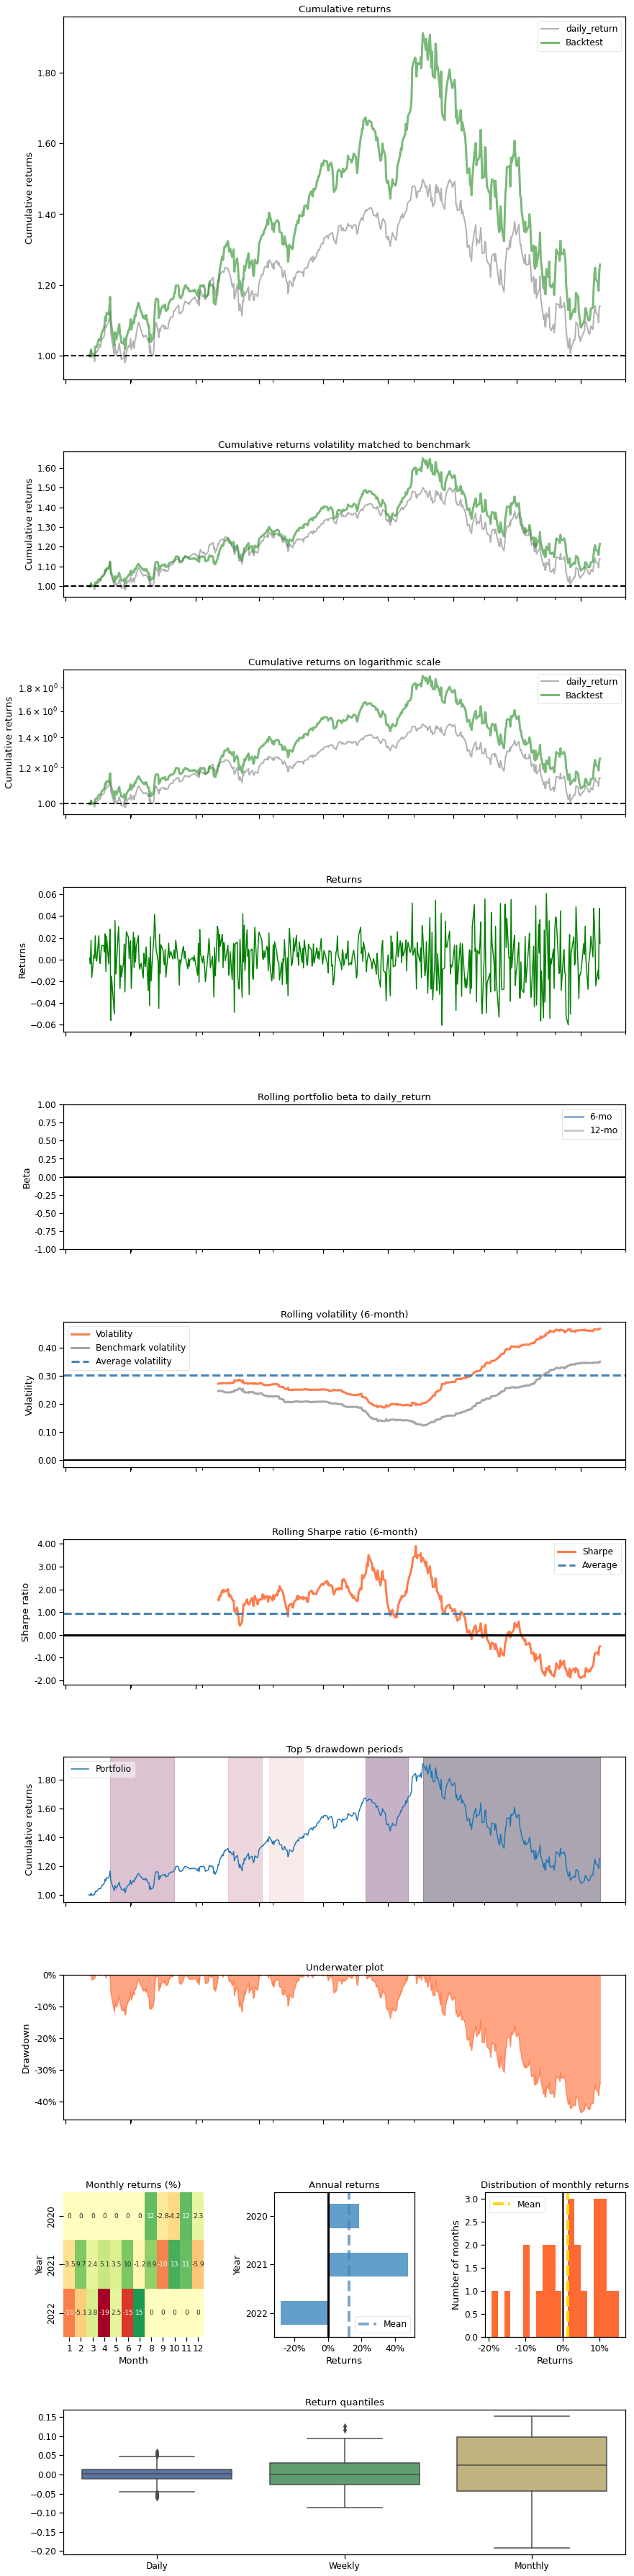

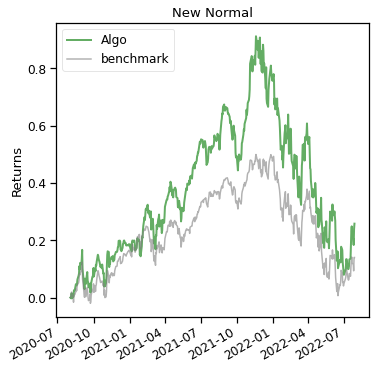

In [41]:
print("Comparion to Benchmark (NASDAQ)")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
backtest_plot(df_account_value, 
             baseline_ticker = '^NDX', 
             baseline_start = df_account_value.loc[0,'date'],
             baseline_end = df_account_value.loc[len(df_account_value)-1,'date'])